In [1]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('poster')
sns.set_style('white')

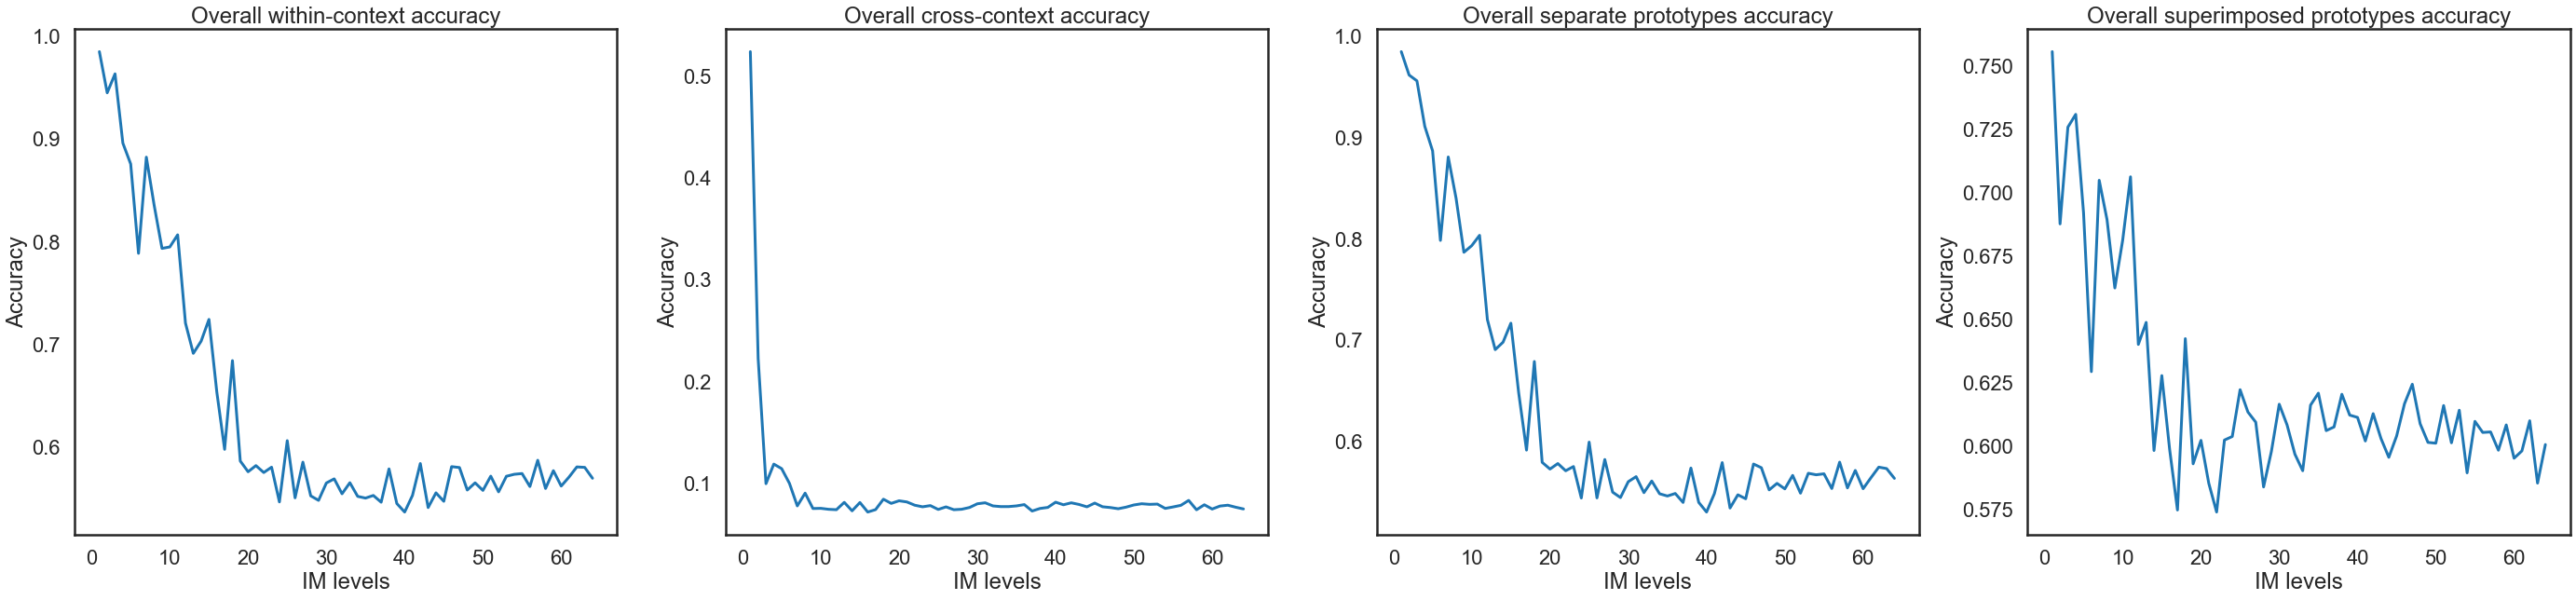

In [3]:
maxLevels = 64

accIn = pd.DataFrame(columns=('Accuracy','IM levels'))
accOut = pd.DataFrame(columns=('Accuracy','IM levels'))
accSep = pd.DataFrame(columns=('Accuracy','IM levels'))
accSuper = pd.DataFrame(columns=('Accuracy','IM levels'))

idx = 0
with open('resIM.pickle','rb') as f:
    res = pickle.load(f)
    for N in range(1,maxLevels+1):
        acc = res[N]
        accIn.loc[idx] = [np.mean(np.diag(acc[0])), N]
        accOut.loc[idx] = [np.mean(acc[0][~np.eye(acc[0].shape[0],dtype=bool)]), N]
        accSep.loc[idx] = [np.mean(acc[1]), N]
        accSuper.loc[idx] = [np.mean(acc[2]), N]
        idx += 1
            
f,ax = plt.subplots(1,4,figsize=(48,10))

sns.lineplot(data=accIn,x='IM levels',y='Accuracy',legend='full',ax=ax[0])
ax[0].set_title('Overall within-context accuracy')

sns.lineplot(data=accOut,x='IM levels',y='Accuracy',legend=False,ax=ax[1])
ax[1].set_title('Overall cross-context accuracy')

sns.lineplot(data=accSep,x='IM levels',y='Accuracy',legend=False,ax=ax[2])
ax[2].set_title('Overall separate prototypes accuracy')

sns.lineplot(data=accSuper,x='IM levels',y='Accuracy',legend=False,ax=ax[3])
ax[3].set_title('Overall superimposed prototypes accuracy')
plt.show()

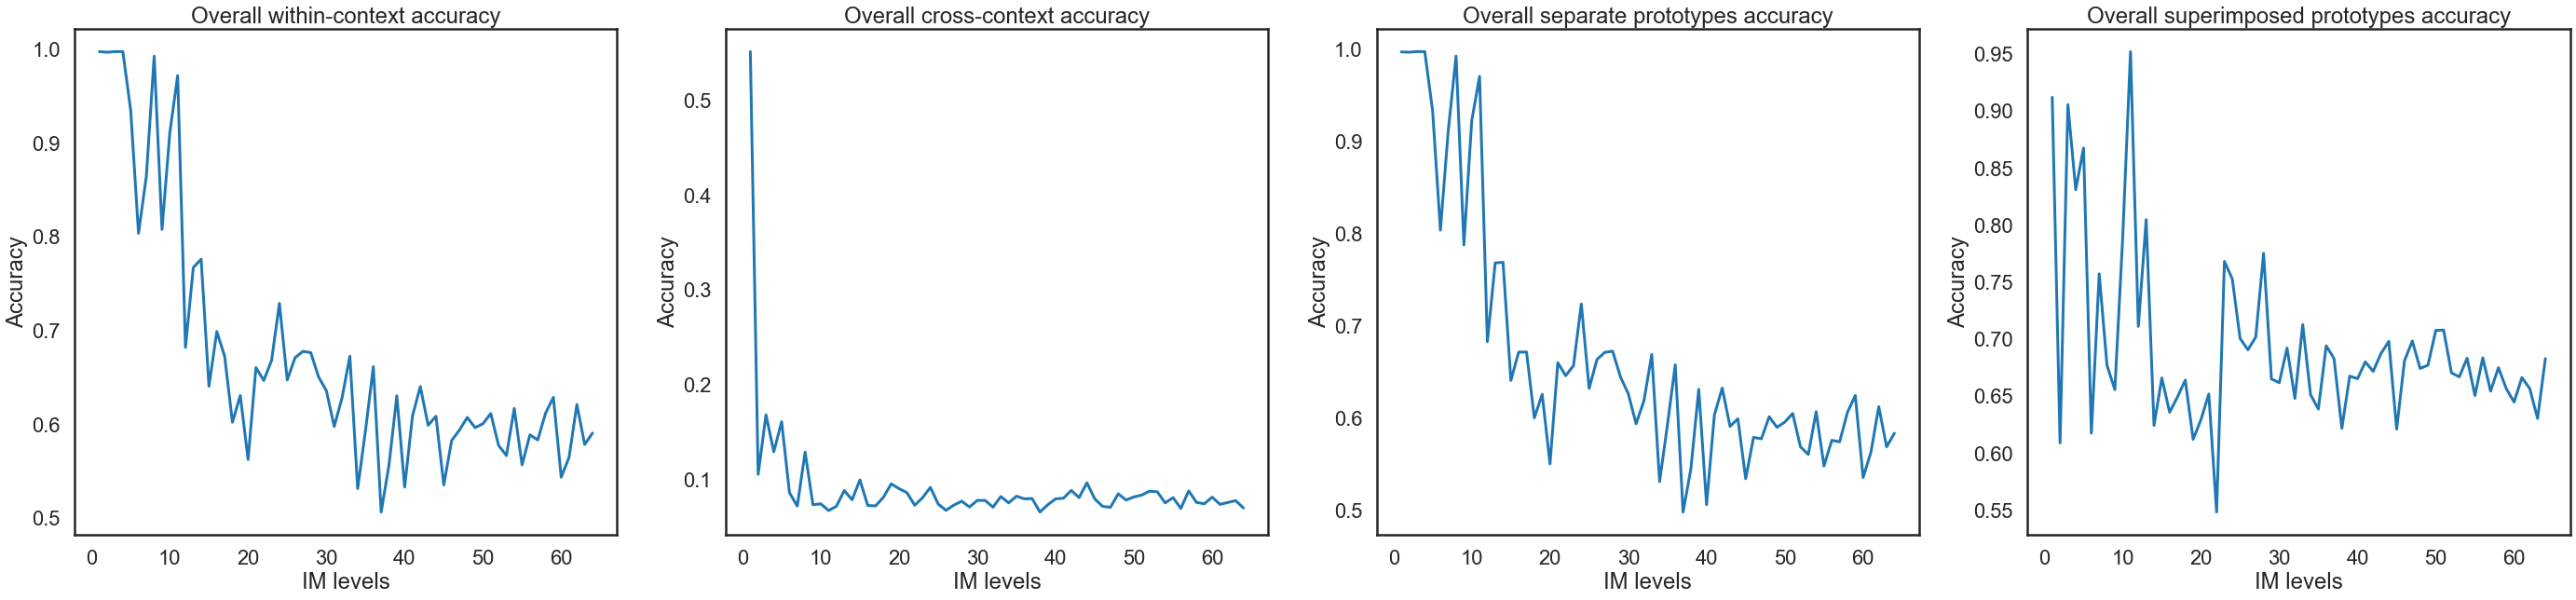

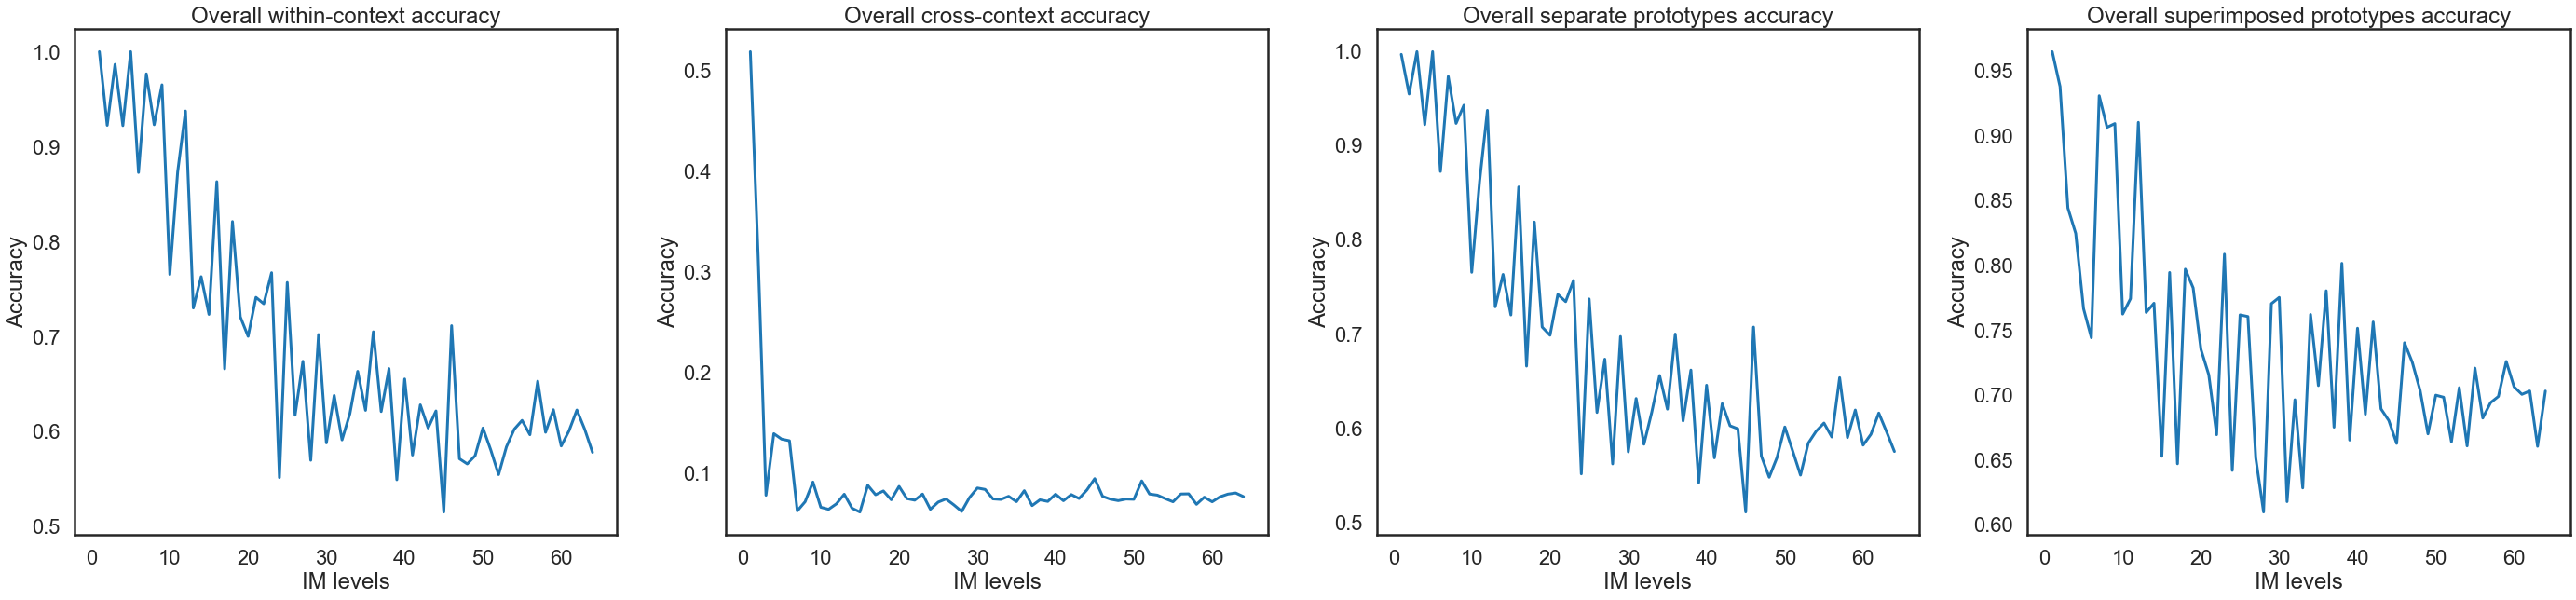

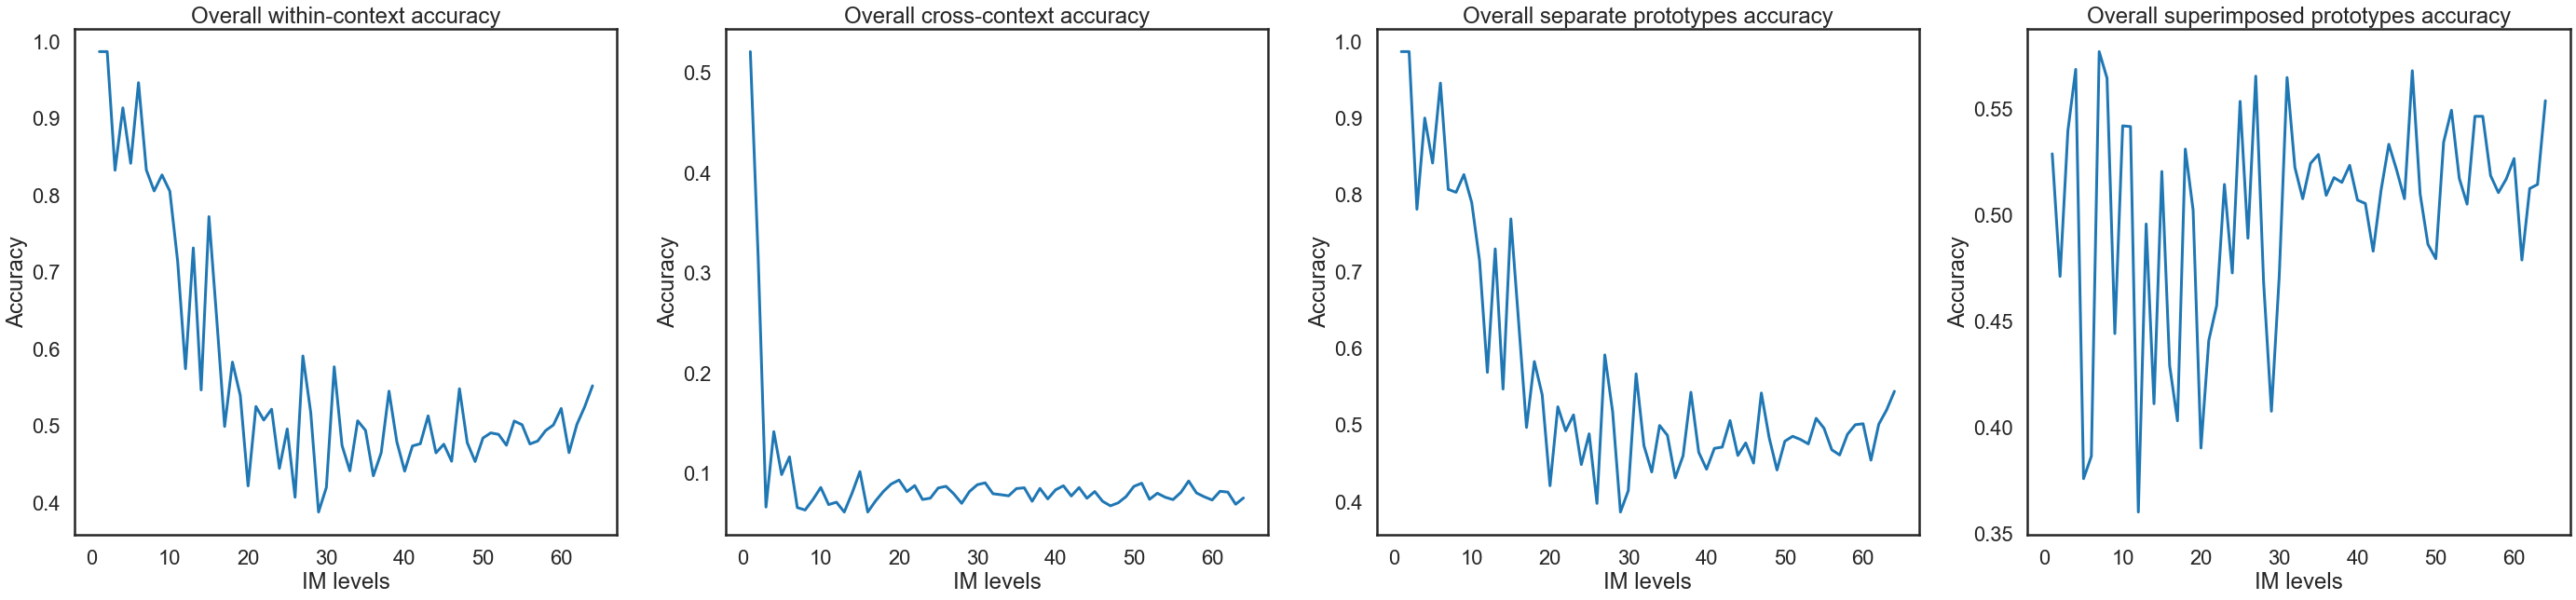

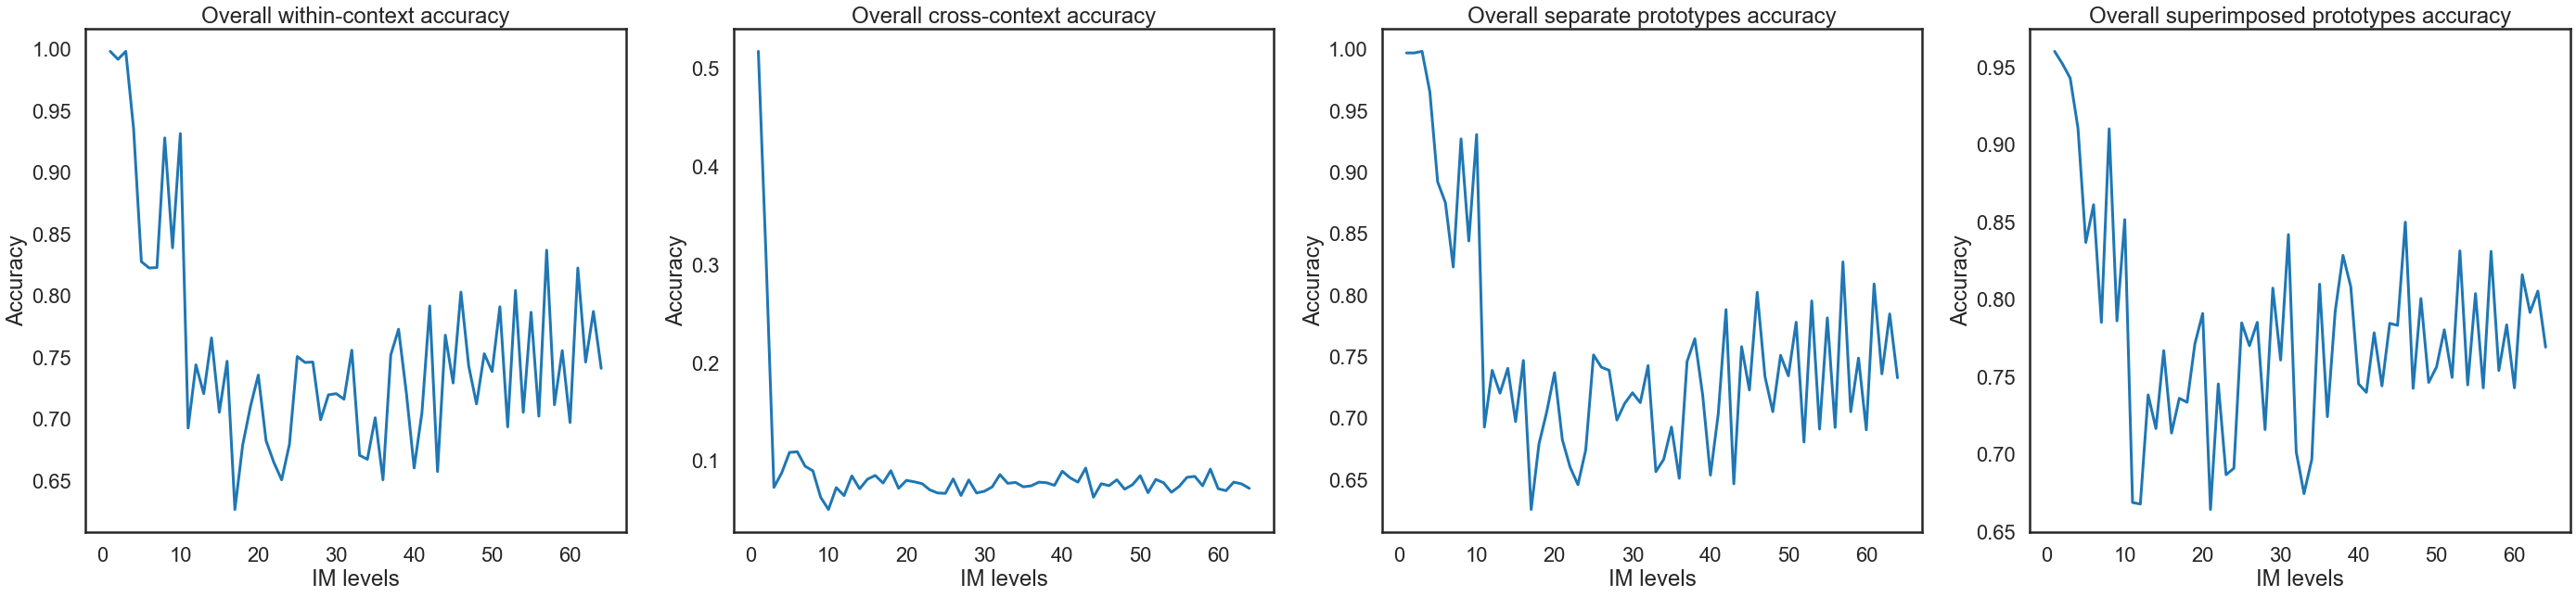

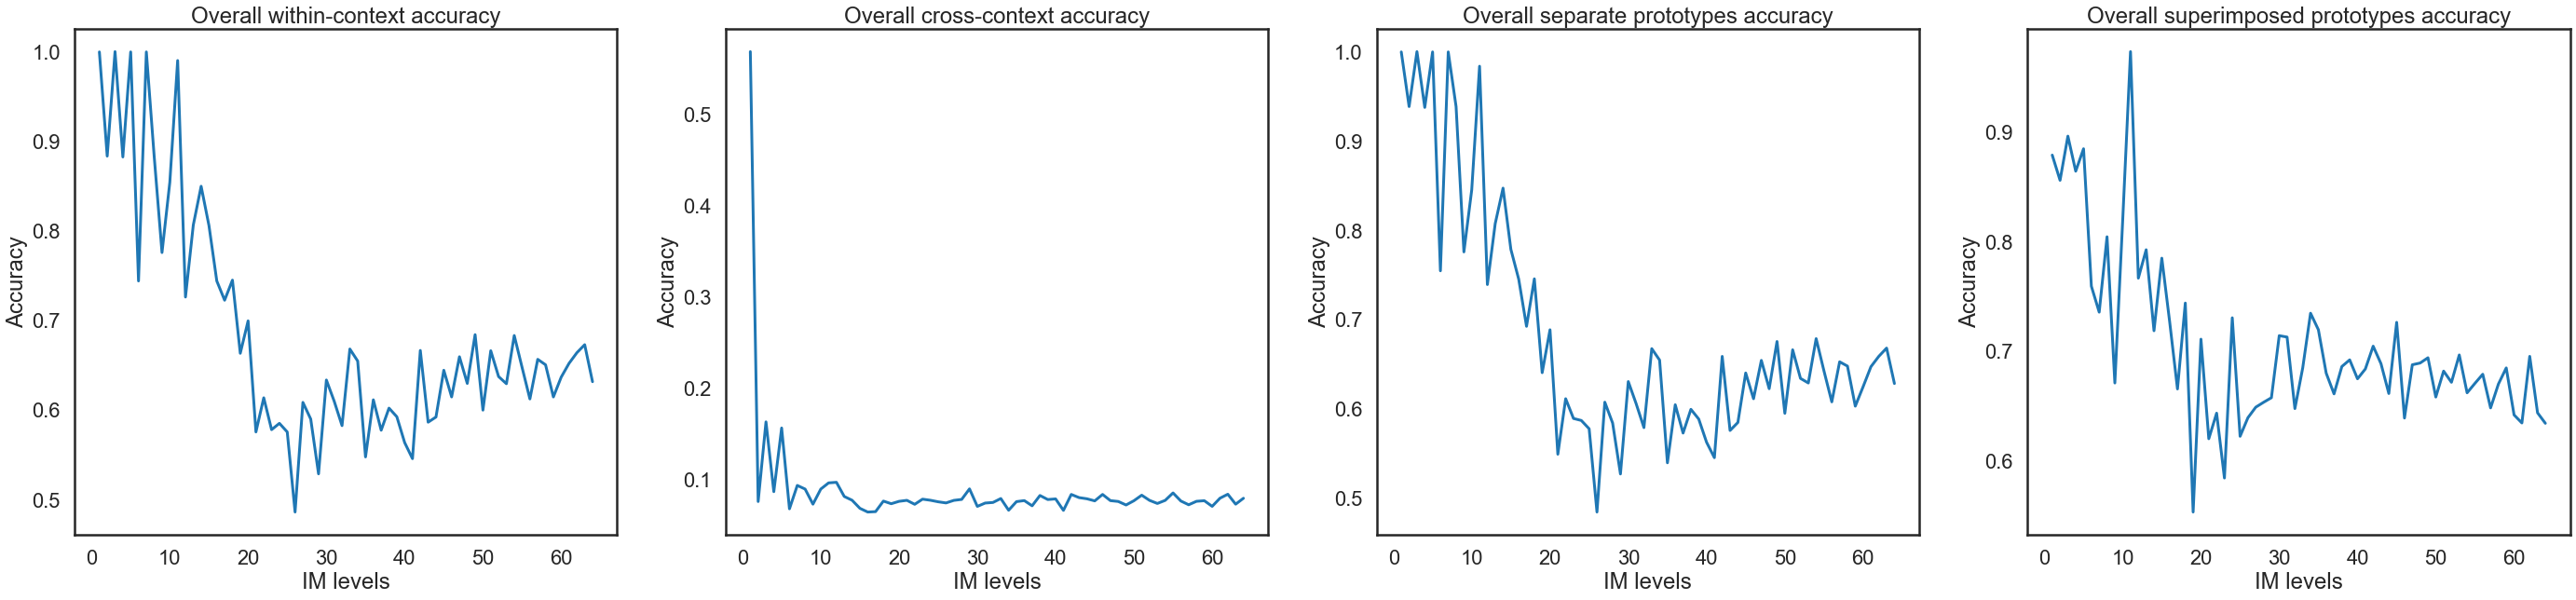

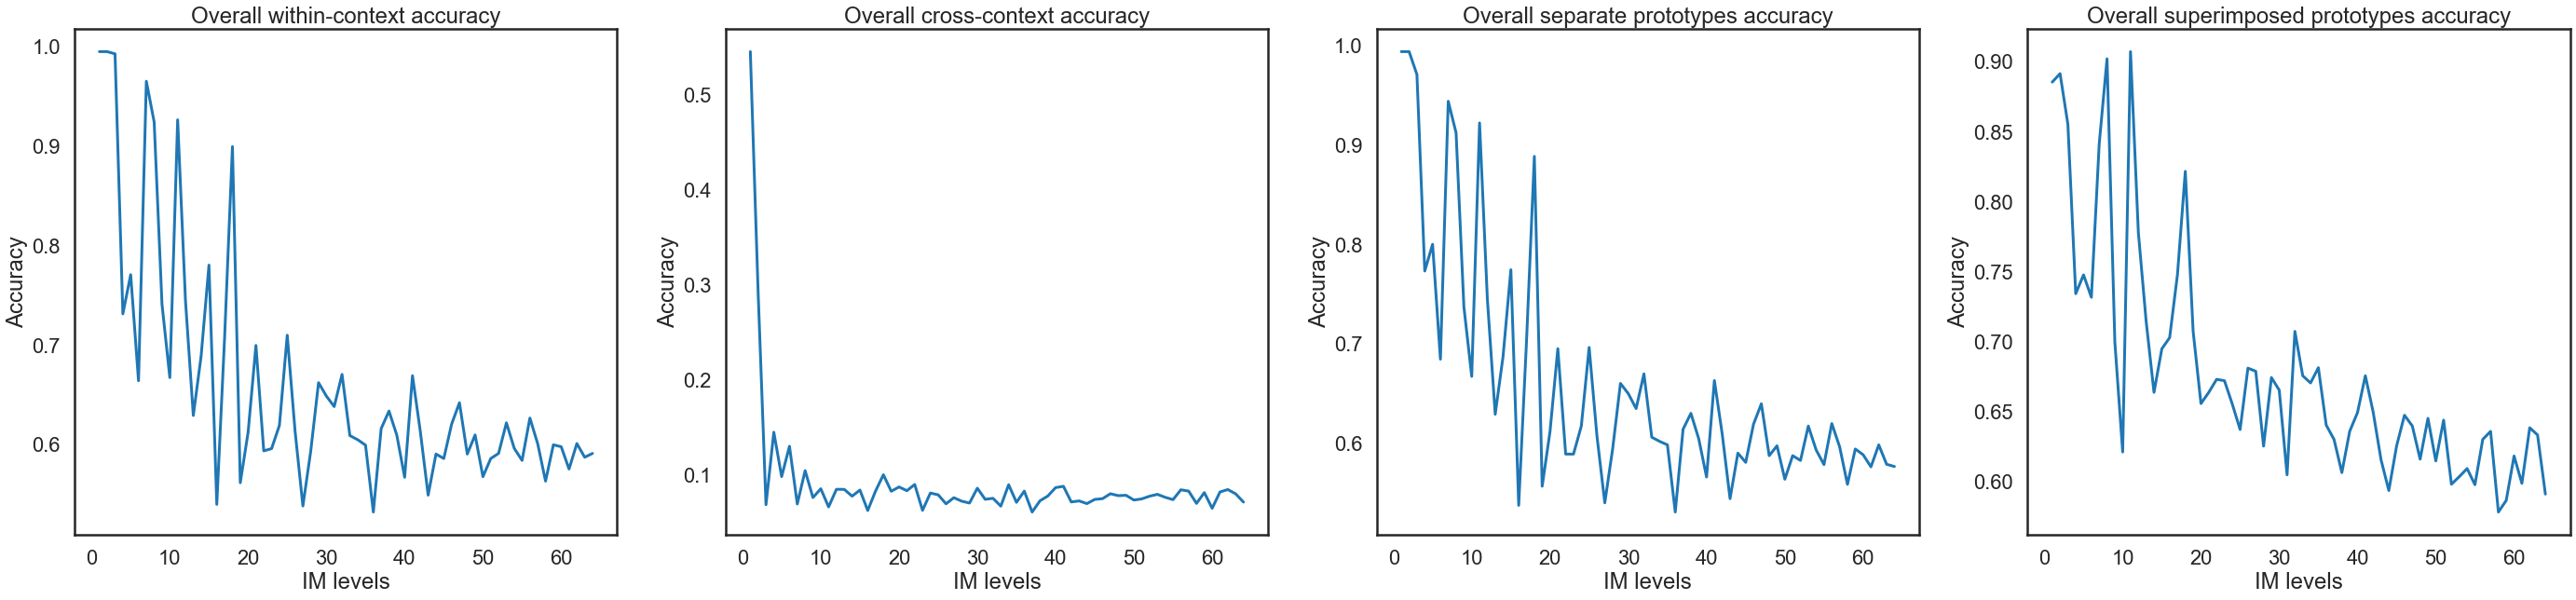

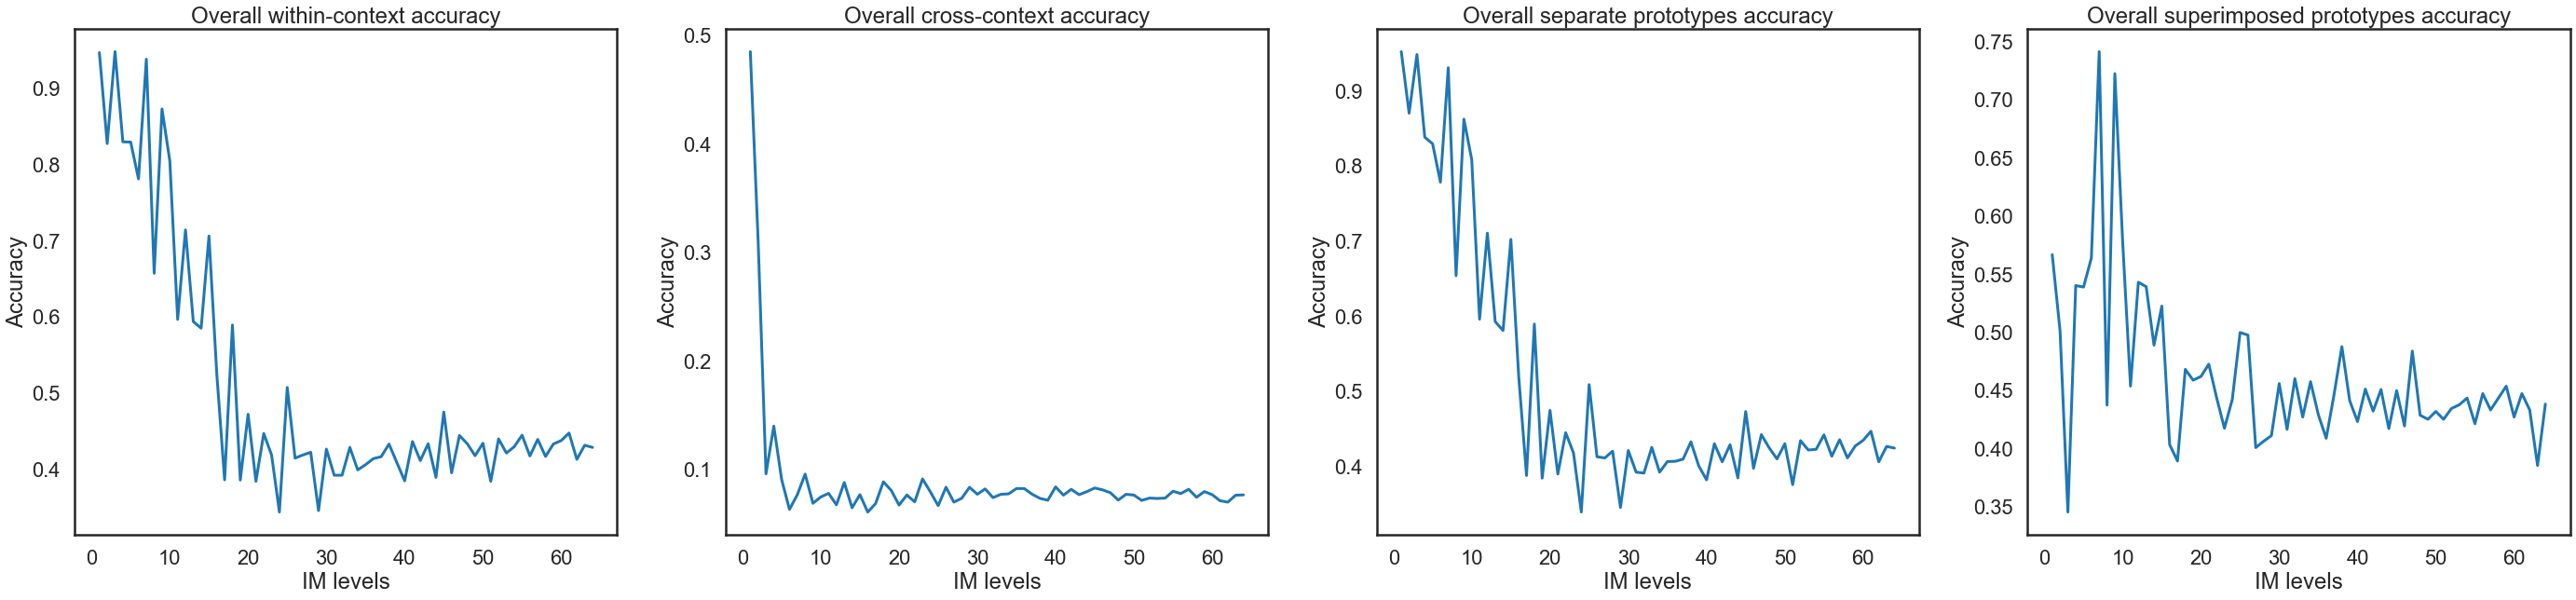

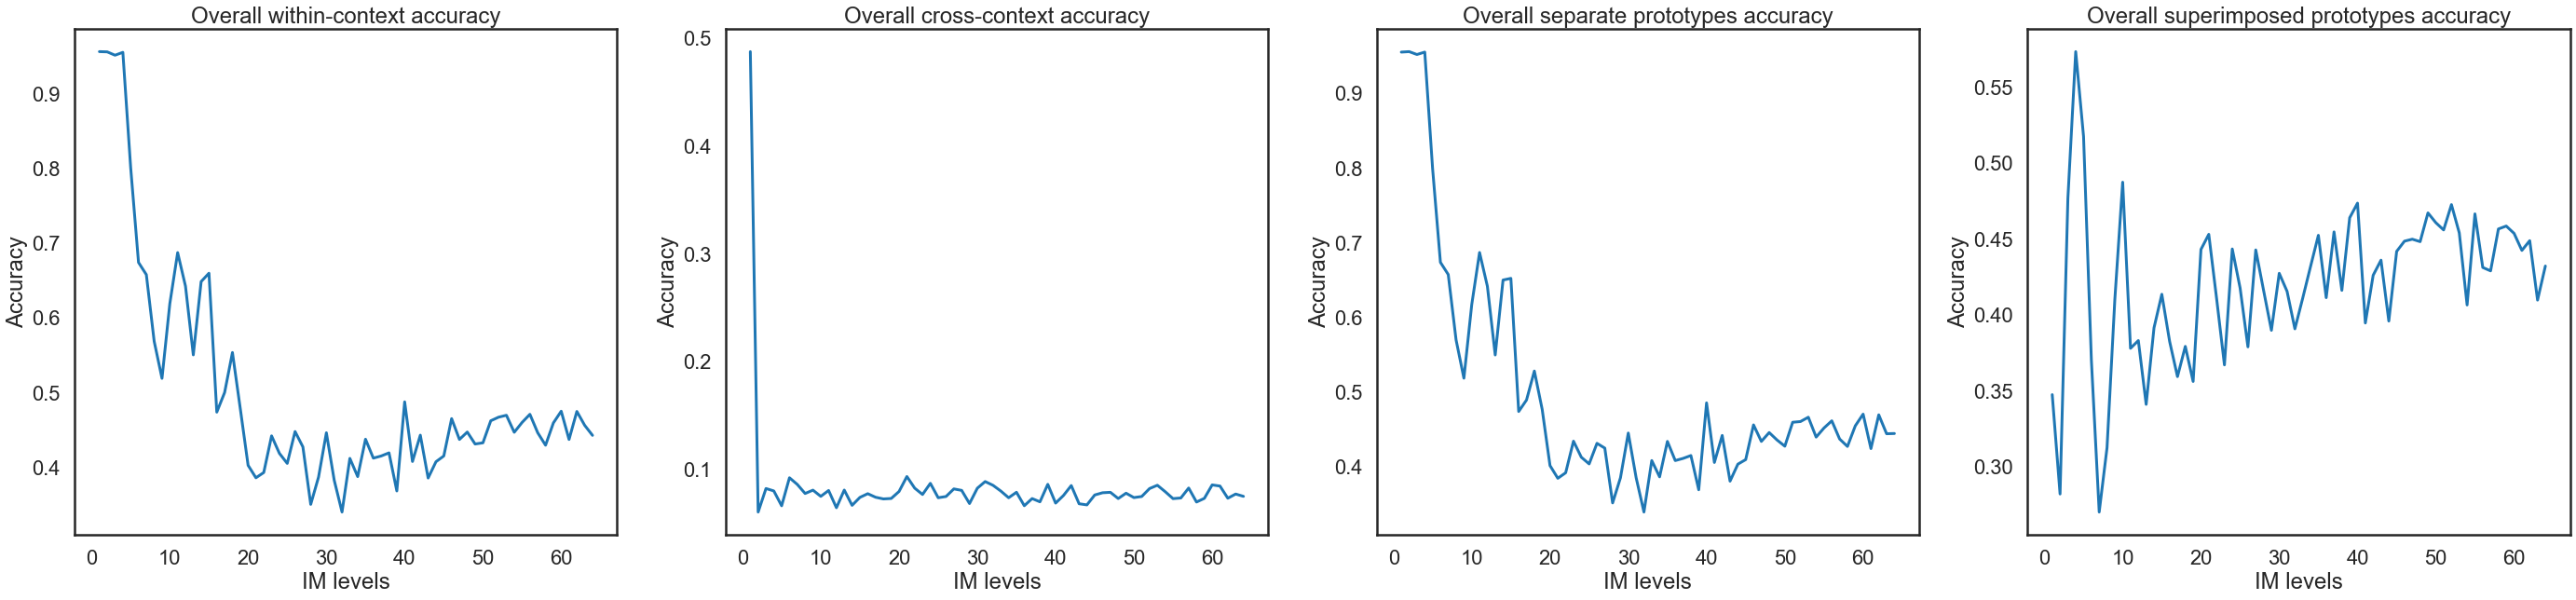

In [4]:
for pos in range(8):
    
    accIn = pd.DataFrame(columns=('Accuracy','IM levels'))
    accOut = pd.DataFrame(columns=('Accuracy','IM levels'))
    accSep = pd.DataFrame(columns=('Accuracy','IM levels'))
    accSuper = pd.DataFrame(columns=('Accuracy','IM levels'))

    idx = 0
    with open('resIM.pickle','rb') as f:
        res = pickle.load(f)
        for N in range(1,maxLevels+1):
            acc = res[N]
            accIn.loc[idx] = [acc[0][pos,pos], N]
            accOut.loc[idx] = [np.mean(acc[0][pos,np.setdiff1d(np.arange(8),pos)]), N]
            accSep.loc[idx] = [acc[1][pos], N]
            accSuper.loc[idx] = [acc[2][pos], N]
            idx += 1

    f,ax = plt.subplots(1,4,figsize=(48,10))

    sns.lineplot(data=accIn,x='IM levels',y='Accuracy',legend='full',ax=ax[0])
    ax[0].set_title('Overall within-context accuracy')

    sns.lineplot(data=accOut,x='IM levels',y='Accuracy',legend=False,ax=ax[1])
    ax[1].set_title('Overall cross-context accuracy')

    sns.lineplot(data=accSep,x='IM levels',y='Accuracy',legend=False,ax=ax[2])
    ax[2].set_title('Overall separate prototypes accuracy')

    sns.lineplot(data=accSuper,x='IM levels',y='Accuracy',legend=False,ax=ax[3])
    ax[3].set_title('Overall superimposed prototypes accuracy')
    plt.show()